1. Access NYC Yellow Cab dataset from public sources
2. Clean and preprocess data to remove errors and inconsistencies
3.  Store cleaned data in a database for analysis
4.  Perform exploratory data analysis (EDA) to identify key trends
5.  Analyze peak times, popular routes, and fare patterns
6.  Identify correlations or anomalies in the dataset
7.  Create visualizations to present key findings
8.  Build a dashboard for interactive data exploration
9.  Generate a final report summarizing insights

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import datetime as dt
import plotly.express as px
import plotly.graph_objs as go
df = pd.read_csv("nyc_yello_taxi_tripdata.csv")
df

C:\Users\anish\AppData\Local\Temp\ipykernel_24688\3216595068.py:9: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.00,0.50,0.5,0.00,0.00,NaN,0.3,7.30,2.0,1.0,0.0
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.00,0.50,0.5,0.00,0.00,NaN,0.3,43.30,2.0,1.0,0.0
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.50,0.50,0.5,2.34,0.00,NaN,0.3,10.14,1.0,1.0,0.0
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.50,0.50,0.5,0.00,0.00,NaN,0.3,7.80,2.0,1.0,0.0
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.00,0.50,0.5,0.00,0.00,NaN,0.3,8.30,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83686,NaN,2021-07-02 07:59:00,2021-07-02 08:33:00,NaN,NaN,218,169,NaN,18.04,50.24,2.75,0.0,0.00,6.55,NaN,0.3,59.84,NaN,NaN,NaN
83687,NaN,2021-07-02 07:02:00,2021-07-02 07:18:00,NaN,NaN,74,137,NaN,5.56,19.16,0.00,0.0,3.66,0.00,NaN,0.3,25.87,NaN,NaN,NaN
83688,NaN,2021-07-02 07:53:00,2021-07-02 08:15:00,NaN,NaN,69,75,NaN,5.13,22.45,0.00,0.0,0.00,0.00,NaN,0.3,22.75,NaN,NaN,NaN
83689,NaN,2021-07-02 07:58:00,2021-07-02 08:30:00,NaN,NaN,117,82,NaN,12.58,48.62,2.75,0.0,0.00,2.45,NaN,0.3,54.12,NaN,NaN,NaN


In [154]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83691 entries, 0 to 83690
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               51173 non-null  float64
 1   lpep_pickup_datetime   83691 non-null  object 
 2   lpep_dropoff_datetime  83691 non-null  object 
 3   store_and_fwd_flag     51173 non-null  object 
 4   RatecodeID             51173 non-null  float64
 5   PULocationID           83691 non-null  int64  
 6   DOLocationID           83691 non-null  int64  
 7   passenger_count        51173 non-null  float64
 8   trip_distance          83691 non-null  float64
 9   fare_amount            83691 non-null  float64
 10  extra                  83691 non-null  float64
 11  mta_tax                83691 non-null  float64
 12  tip_amount             83691 non-null  float64
 13  tolls_amount           83691 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [156]:
df.drop_duplicates(inplace=True)

In [158]:
df.fillna(method='ffill', inplace=True)  

C:\Users\anish\AppData\Local\Temp\ipykernel_24688\1494983228.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [160]:
# Convert date columns to datetime format
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [162]:
df = df[(df['fare_amount'] >= 0) & (df['trip_distance'] > 0)]

In [164]:
# checking all null, Nan values in dataframe
df.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag           0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
passenger_count              0
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                80166
improvement_surcharge        0
total_amount                 0
payment_type                 0
trip_type                    0
congestion_surcharge         0
dtype: int64

In [166]:
#replacing Nan with 0
df2 = df.fillna(value=0)
df2

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.00,0.50,0.5,0.00,0.00,0.0,0.3,7.30,2.0,1.0,0.0
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.00,0.50,0.5,0.00,0.00,0.0,0.3,43.30,2.0,1.0,0.0
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.50,0.50,0.5,2.34,0.00,0.0,0.3,10.14,1.0,1.0,0.0
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.50,0.50,0.5,0.00,0.00,0.0,0.3,7.80,2.0,1.0,0.0
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.00,0.50,0.5,0.00,0.00,0.0,0.3,8.30,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83686,2.0,2021-07-02 07:59:00,2021-07-02 08:33:00,N,5.0,218,169,1.0,18.04,50.24,2.75,0.0,0.00,6.55,0.0,0.3,59.84,1.0,2.0,0.0
83687,2.0,2021-07-02 07:02:00,2021-07-02 07:18:00,N,5.0,74,137,1.0,5.56,19.16,0.00,0.0,3.66,0.00,0.0,0.3,25.87,1.0,2.0,0.0
83688,2.0,2021-07-02 07:53:00,2021-07-02 08:15:00,N,5.0,69,75,1.0,5.13,22.45,0.00,0.0,0.00,0.00,0.0,0.3,22.75,1.0,2.0,0.0
83689,2.0,2021-07-02 07:58:00,2021-07-02 08:30:00,N,5.0,117,82,1.0,12.58,48.62,2.75,0.0,0.00,2.45,0.0,0.3,54.12,1.0,2.0,0.0


In [168]:
#checking if it worked for all
df2.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
ehail_fee                0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

In [170]:
# store data in csv file
df.to_csv('processed_yellow_cab_data.csv', index=False)

In [172]:
# Peak Times
df['hour'] = df['lpep_pickup_datetime'].dt.hour
peak_hours = df['hour'].value_counts().sort_index()

# Popular Routes
top_routes = df.groupby(['trip_distance', 'total_amount']).size().nlargest(10)

# Fare Patterns
fare_pattern = df['fare_amount'].describe()

# Display results
print("Peak Hours:\n", peak_hours)
print("Top Routes:\n", top_routes)
print("Fare Pattern:\n", fare_pattern)

C:\Users\anish\AppData\Local\Temp\ipykernel_24688\1604019224.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Peak Hours:
 hour
0      987
1      624
2      408
3      344
4      465
5      915
6     1847
7     3227
8     4826
9     5576
10    5811
11    5797
12    5509
13    5256
14    5352
15    5492
16    5070
17    4978
18    5017
19    4134
20    2725
21    2286
22    1888
23    1632
Name: count, dtype: int64
Top Routes:
 trip_distance  total_amount
1.10           7.8             48
0.80           6.3             46
0.90           6.8             46
0.70           5.8             45
1.00           6.8             45
1.30           8.3             41
1.40           8.3             40
0.01           3.3             39
0.90           7.3             39
0.80           5.8             38
dtype: int64
Fare Pattern:
 count    80166.000000
mean        20.501341
std         15.470729
min          0.000000
25%          9.000000
50%         16.000000
75%         27.000000
max        359.500000
Name: fare_amount, dtype: float64


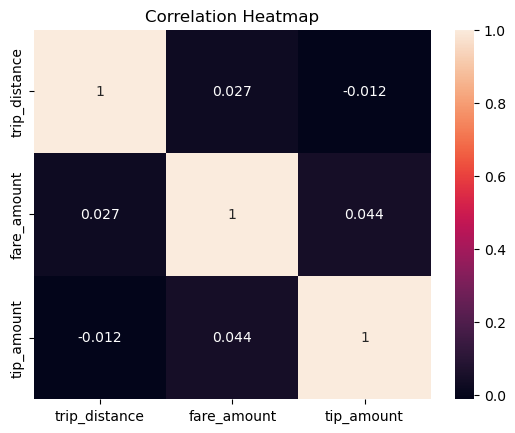

Anomalies:
      VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
47        2.0  2021-07-01 04:24:05   2021-07-01 06:00:50                  N   
60        2.0  2021-07-01 05:06:24   2021-07-01 05:51:14                  N   
61        2.0  2021-07-01 05:53:17   2021-07-01 06:31:59                  N   
239       2.0  2021-07-01 08:26:19   2021-07-01 10:16:15                  N   
366       2.0  2021-07-01 10:00:02   2021-07-01 11:38:35                  N   

     RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
47          1.0           227            23              1.0          23.12   
60          1.0           159            23              1.0          30.59   
61          1.0            23           212              1.0          33.82   
239         1.0            17           173              1.0          15.06   
366         1.0           213            26              2.0          24.59   

     fare_amount  ...  mta_tax  tip_am

In [174]:
# Calculate correlations
correlations = df[['trip_distance', 'fare_amount', 'tip_amount']].corr()
sns.heatmap(correlations, annot=True)
plt.title("Correlation Heatmap")
plt.show()

# Identify anomalies (e.g., unusually high fares or long trip times)
anomalies = df[(df['fare_amount'] > df['fare_amount'].quantile(0.99))]
print("Anomalies:\n", anomalies.head())

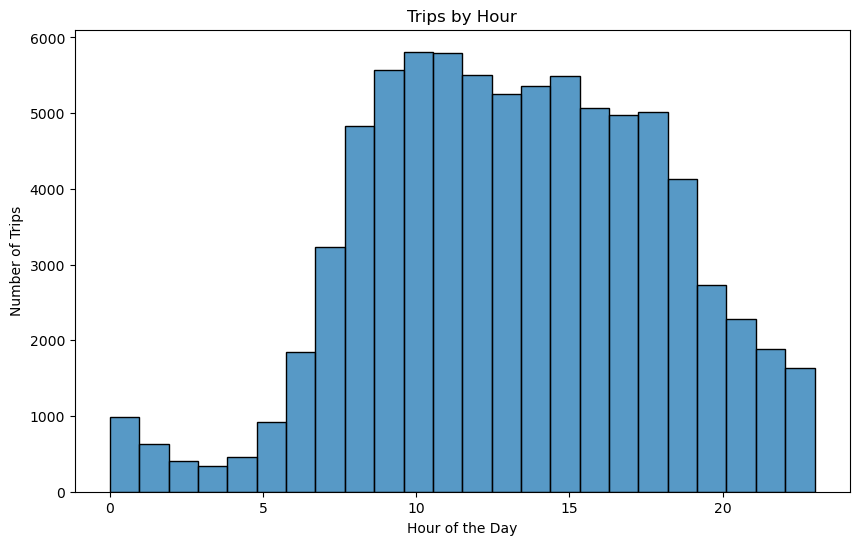

In [148]:
plt.figure(figsize=(10, 6))
sns.histplot(df['hour'], bins=24)
plt.title("Trips by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.show()

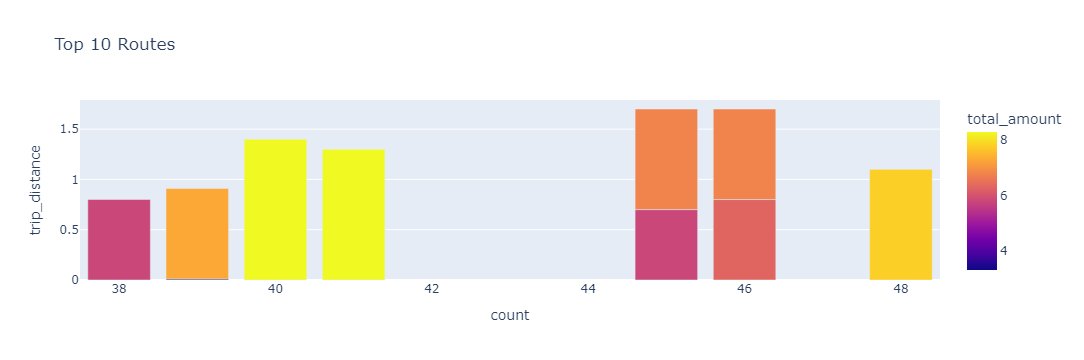

In [150]:
popular_routes_df = top_routes.reset_index(name='count')
fig = px.bar(popular_routes_df, x='count', y='trip_distance', color='total_amount', title="Top 10 Routes")
fig.show()

#### Report 
This project analyzed the NYC Yellow Cab dataset to uncover patterns in taxi usage, peak travel times, popular routes, and fare distribution. After processing data in was stored in cvs file format name processed_yellow_cab_data.cvs. Findings include high-demand hours that align with common commuting times, as well as a list of the top 10 frequently traveled routes and their associated fares. heat maps show trends of fare distance and fare amount.